img.shape: (500, 750, 3)


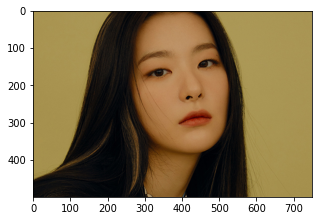

In [18]:
import numpy as np
import time
import matplotlib.pyplot as plt

img = plt.imread('/content/drive/MyDrive/test.jpg')
img = img/255
#shape = img.shape # H,W = img.shape ? 
print("img.shape:", img.shape)
plt.figure(figsize = (5,8))
plt.imshow(img, 'gray')

Text(0, 0.5, 'output pixel')

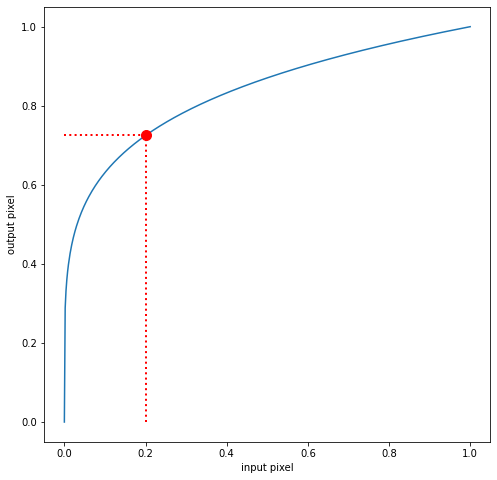

In [8]:
# 이미지의 어두운 부분을 더 자세히 보고 싶다면 power function의 특징을 이용하여 다음과 같은 모양의 filter를 이용할 것이다.

x_range = np.linspace(0,1,500)
y = np.power(x_range, 0.2)

plt.figure(figsize = (8,8))
plt.plot(x_range, y)
plt.plot(x_range[100], y[100], 'ro', markersize = 10)
plt.plot([x_range[100], x_range[100]], [0, y[100]], 'r:', linewidth = 2)
plt.plot([0, x_range[100]], [y[100], y[100]], 'r:', linewidth = 2)
plt.xlabel("input pixel")
plt.ylabel("output pixel")

Elapsed Time: 0.16318655014038086 sec


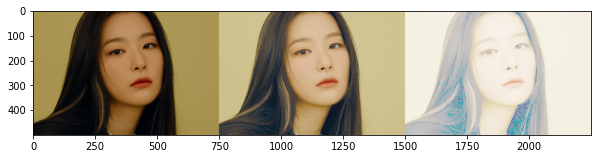

In [24]:
tic = time.time()

t_img = np.power(img, 0.5) # 제곱하는 수를 낮출 수록 밝아진다
t_img2 = np.power(img, 0.1) # 제곱하는 수를 낮출 수록 밝아진다
toc = time.time()
vec_time = toc - tic

img_stack = np.hstack((img, t_img, t_img2))
plt.figure(figsize = (10,8))
plt.imshow(img_stack, 'gray')
print("Elapsed Time:", vec_time, 'sec')

# 이 vectorization은 matrix 전체를 한 번에 연산한다. (500, 750, 3)의 이미지면 요즘 다루는 이미지들에 비해 큰 편은 아니다. 
# 그리고 이미지에는 총 375,000개의 pixel이 있으므로 vectorization의 효과는 이미지가 더 커질수록 빛을 발할 것임을 알 수 있다.

In [19]:
# 우리가 실제 프로그램을 만들 때 Vectorization의 이득을 가장 많이 보는 부분은 행렬의 곱셈일 것이다.
# 전의 Notebook에서 하나의 matrix에 대한 연산을 진행했다면 
# 이번 시간에는 두 행렬의 곱셈에 대하여 Vectorization이 얼마나 효과적일지 살펴보기 전에 
# 먼저 Matrix와 Vector의 Multiplication을 살펴보고 다음 notebook에서 두 행렬의 곱셈을 다뤄보도록 하자.

#먼저 다음과 같이 matrix와 vector를 만들어보자.
m, n = 2000, 1000
A = np.random.rand(m,n)
B = np.random.rand(n,1)
C = np.zeros(shape = (m,1))
print(A.shape, B.shape, C.shape)

# 위와 같이 (2000,1000)의 행렬 A와 1000차원의 vector B을 만들었다. 
# 이 matrix와 vector에 대해서 multiplication을 이용하면 얼마나 빨라질지 살펴보도록 하자.

(2000, 1000) (1000, 1) (2000, 1)


In [21]:
tic = time.time()

for row_idx in range(m):
    for col_idx in range(n):
        C[row_idx] += A[row_idx, col_idx]*B[col_idx]
        
toc = time.time()
for_time = toc - tic

print("Elapsed Time:", for_time, 'sec')

Elapsed Time: 7.731208086013794 sec


In [20]:
tic = time.time()

C = np.dot(A,B) # matrix와 vector에 대해서 multiplication

toc = time.time()
vec_time = toc - tic

print("Elapsed Time:", vec_time, 'sec')

Elapsed Time: 0.007646322250366211 sec


In [22]:
print("Elapsed Time Ratio:", for_time/vec_time)

Elapsed Time Ratio: 1011.1015247419788


In [ ]:
m, n = 100000, 1000
A = np.random.rand(m,n)
B = np.random.rand(n,1)
C = np.zeros(shape = (m,1))
print(A.shape, B.shape, C.shape)

tic = time.time()

for row_idx in range(m):
    for col_idx in range(n):
        C[row_idx] += A[row_idx, col_idx]*B[col_idx]
        
toc = time.time()
for_time = toc - tic

print("Elapsed Time:", for_time, 'sec')

tic = time.time()

C = np.dot(A,B) # matrix와 vector에 대해서 multiplication

toc = time.time()
vec_time = toc - tic

print("Elapsed Time:", vec_time, 'sec')

print("Elapsed Time Ratio:", for_time/vec_time)

In [ ]:
# 이번 2차원 Vectorization에서는 notebook3에서 다뤘던 DTFT를 하나의 주파수가 아닌 주파수 영역에서 구해보려고 한다. 
# 먼저 Foureir Transform의 식을 임의의 주파수에서 구해보자

from scipy.io import wavfile
fs, data = wavfile.read('./test_audio.wav')
data = (data[:,0] + data[:,1])/2
fig, ax = plt.subplots(figsize = (15,6))
ax.plot(data)

In [ ]:
n_f, n_s = 100, data.shape[0]

f_range = np.linspace(-20, 20, n_f).reshape(n_f,1)
Xf = np.zeros(shape = (f_range.shape), dtype = np.complex)

In [ ]:
tic = time.time()
PI = np.pi

for f_idx in range(n_f):
    f = f_range[f_idx]
    for s_idx in range(n_s):
        s = data[s_idx]
        Xf[f_idx] += s * np.exp(-2j*PI*f*s_idx)
        
for f_idx in range(n_f):
    Xf[f_idx] = np.abs(Xf[f_idx])
    
toc = time.time()
for_time = toc - tic
print("Elapsed Time:", for_time, 'sec')

plt.figure(figsize = (10,5))
plt.plot(Xf)
plt.yscale('log')

In [ ]:
#그러면 위의 과정을 Vectorization으로 구해보자.
# 다음 연산은 여러 단계로 나누는 것이 더 알아보기 좋으므로 Step으로 나눠서 알아보자.

#전체 단계 중에서 다음과 같이 나눌 수 있다.
#먼저 가장 크게 Vectorized operation이 진행되는 부분은 전체 f와 data를 곱하는 부분인 step1이다.

tiled_data = np.tile(data, (n_f, 1))
print("tiled_data.shape:", tiled_data.shape) # (f 개수, data 개수)
print("f_range.shape:", f_range.shape)

step1 = tiled_data*f_range
print("step1.shape:", step1.shape)

In [ ]:
#위와 같이 broadcasting을 이용하여 f의 값들을 차례대로 data들에 곱해준다.

step2 = -2j*PI*step1
print("step2.shape:", step2.shape)

In [ ]:
step3 = np.exp(step2)
print("step3.shape:", step3.shape)

In [ ]:
print("step3.shape:", step3.shape)
print("data.shape:", data.shape)

step4 = step3*data
print("step4.shape:", step4.shape)

In [ ]:
step5 = np.abs(np.sum(step4, axis = 1))
print(step5.shape)

In [ ]:
#위의 과정에서 frequency response를 구하기 위해 절대값까지 같이 취해준다.
#위의 과정을 모두 종합하면 다음과 같다.

tic = time.time()
PI = np.pi

DTFT = np.abs(np.sum((np.exp(-2j*PI*(np.tile(data, (n_f, 1)))*f_range))*data, axis = 1))

toc = time.time()
vec_time = toc - tic
print("Elapsed Time:", vec_time, 'sec')

plt.figure(figsize = (10,5))
plt.plot(DTFT)
plt.yscale('log')

In [ ]:
print("Elapsed Time Ratio:", for_time / vec_time)

In [ ]:
#즉, 하나의 test audio file에 대해 FFT를 할 때도 ??배의 연산속도 차이가 났다.
# 위의 data들의 shape을 살펴보면 다음과 같다.

print("data.shape:", data.shape)
print("f_range.shape:", f_range.shape)

#위와 같이 하나의 ??초짜리 audio file도 ?? point가 나오므로 실제로 우리가 다루게 되는 data는 훨씬 더 클 것을 예상할 수 있다.
#따라서 vectorization이 더더욱 중요해질 것은 분명해 보인다